#Load Data

In [1]:
from os import listdir
from PIL import Image as PImage
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint

In [2]:
def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    files_name = []
    for image in imagesList:
      hdu_list = fits.open(path + '/' + image)
      image_data = hdu_list[0].data
      loadedImages.append(image_data)
      files_name.append(image)
    hdu_list.close()
    return loadedImages, files_name

In [ ]:
path = '/content/drive/MyDrive/Master\'s Project (News)/images'
imgs, files_name = loadImages(path)

In [ ]:
files_name[:5]

['img_255_Cluster.fits',
 'img_254_Cluster_5631.fits',
 'img_254_Cluster.fits',
 'img_253_Cluster.fits',
 'img_252_Cluster.fits']

# Process to get number and labels of object

In [ ]:
files_name[0:10]

['img_255_Cluster.fits',
 'img_254_Cluster_5631.fits',
 'img_254_Cluster.fits',
 'img_253_Cluster.fits',
 'img_252_Cluster.fits',
 'img_235_Cluster.fits',
 'img_251_Cluster.fits',
 'img_242_Cluster.fits',
 'img_249_Cluster.fits',
 'img_233_Cluster.fits']

In [ ]:
labeleds_list = []
for i in files_name:
  temp_ = i.split('.')[0].split('_')
  labeleds_list.append([temp_[1], temp_[2]])

In [ ]:
# labeleds_list[:100]

#Preprocessing

In [ ]:
imgs_arr = np.array(imgs,dtype=object)

In [ ]:
print(imgs_arr[0])

[[0.14750587940216064 0.24201716482639313 0.49464210867881775 ...
  0.22949044406414032 0.18062321841716766 0.17175622284412384]
 [0.14577434957027435 0.19247707724571228 0.35876044631004333 ...
  0.23348812758922577 0.23580072820186615 0.17534597218036652]
 [0.16136249899864197 0.16589024662971497 0.21667495369911194 ...
  0.19036197662353516 0.20463012158870697 0.16321535408496857]
 ...
 [0.1901037096977234 0.2073492407798767 0.22651606798171997 ...
  0.11608894169330597 0.120408795773983 0.14558158814907074]
 [0.1387561559677124 0.14728492498397827 0.17204324901103973 ...
  0.17255957424640656 0.1774289906024933 0.18247681856155396]
 [0.17202383279800415 0.18397022783756256 0.20870086550712585 ...
  0.31151509284973145 0.27298596501350403 0.2134605050086975]]


In [ ]:
min_pixel = np.min(imgs_arr)
max_pixel = np.max(imgs_arr)
mean_pixel = np.mean(imgs_arr)
std_pixel = np.std(imgs_arr)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -0.43455109000205994
Max: 186.626708984375
Mean: nan
Stdev: nan


In [ ]:
imgs_arr = imgs_arr.astype('float64')

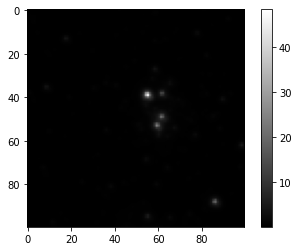

In [ ]:
plt.imshow(imgs_arr[100], cmap='gray')
plt.colorbar()

In [ ]:
imgs_arr.shape

(127, 100, 100)

# Fill death pixel with -100

In [ ]:
imgs_arr_scaled = imgs_arr.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = -100

In [ ]:
min_pixel = np.min(imgs_arr_scaled)
max_pixel = np.max(imgs_arr_scaled)
mean_pixel = np.mean(imgs_arr_scaled)
std_pixel = np.std(imgs_arr_scaled)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -100.0
Max: 186.626708984375
Mean: 0.3235618737625006
Stdev: 1.48638830067117


#Reshap Image

In [ ]:
def reshape_for_model(origin_img):
  size, crop_x, crop_y = origin_img.shape
  return origin_img.reshape(size, (crop_x*crop_y))

In [ ]:
def reshape_img(img, width = 100, height = 100):
  return img.reshape(width, width)

In [ ]:
data_for_learn = reshape_for_model(imgs_arr_scaled)
data_for_learn.shape

(127, 10000)

# Normalize Data

## min max scale

In [ ]:
# normalized_data = ((data_for_learn - min_pixel)/(max_pixel - min_pixel))

In [ ]:
# print(np.min(normalized_data), np.max(normalized_data))

In [ ]:
# normalized_data.shape

## rescale 0-255

In [ ]:
normalized_data = ((data_for_learn - min_pixel)/(max_pixel - min_pixel)) * 255

In [ ]:
print(np.min(normalized_data), np.max(normalized_data))

0.0 255.0


In [ ]:
normalized_data[0]

array([89.097119  , 89.18120181, 89.40595183, ..., 89.24303126,
       89.20875347, 89.15579612])

In [ ]:
normalized_data.shape

(127, 10000)

In [ ]:
min_pixel = np.min(normalized_data)
max_pixel = np.max(normalized_data)
mean_pixel = np.mean(normalized_data)
std_pixel = np.std(normalized_data)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: 0.0
Max: 255.0
Mean: 89.25374878167408
Stdev: 1.3223785669318433


# Export images as a jpg

## local

In [ ]:
path_to_save = '/content/drive/MyDrive/Master\'s Project (News)/jpg/local'

In [ ]:
normalized_data[0]

In [ ]:
labeleds_list[0][0], labeleds_list[0][1]

In [ ]:
a = reshape_img(normalized_data[0])
a.shape

In [ ]:
dup_check = []
for i in range(len(normalized_data)):
  img_ = reshape_img(normalized_data[i])
#   if labeleds_list[i][0] in dup_check : # duplicate
#     filename = "/content/drive/MyDrive/Master's Project (News)/jpg/local/{}_{}.jpg".format(labeleds_list[i][0], 
#                                                                                          dup_check.count(labeleds_list[i][0]))
#     plt.imsave(filename, img_, cmap='gray')
#     dup_check.append(labeleds_list[i][0])
#   else:
#     filename = "/content/drive/MyDrive/Master's Project (News)/jpg/local/{}.jpg".format(labeleds_list[i][0])
#     plt.imsave(filename, img_, cmap='gray')
#     dup_check.append(labeleds_list[i][0])

## global

In [ ]:
path = '../data/scaled_fits/'
imgs, files_name = loadImages(path)

In [16]:
labeleds_list = []
for i in files_name:
  temp_ = i.split('.')[0].split('_')
#   print(temp_)
  labeleds_list.append(temp_)

In [17]:
files_name

['1.fits',
 '10.fits',
 '2.fits',
 '3.fits',
 '4.fits',
 '5.fits',
 '6.fits',
 '7.fits',
 '8.fits',
 '9.fits']

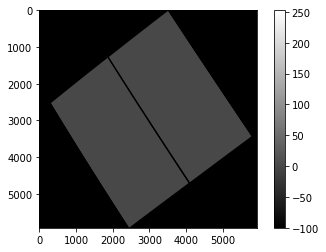

In [22]:
plt.imshow(imgs[0], cmap='gray')
# plt.imshow(imgs[0], cmap='Greys')
plt.colorbar()

In [20]:
dup_check = []
for i in range(len(imgs)):
  img_ = imgs[i]
  # if labeleds_list[i][0] in dup_check : # duplicate
  #   filename = "../data/jpg/global/{}_{}.jpg".format(labeleds_list[i][0], 
  #                                                                                        dup_check.count(labeleds_list[i][0]))
  #   plt.imsave(filename, img_, cmap='gray')
  #   dup_check.append(labeleds_list[i][0])
  # else:
  #   filename = "../data/jpg/global/{}.jpg".format(labeleds_list[i][0])
  #   plt.imsave(filename, img_, cmap='gray')
  #   dup_check.append(labeleds_list[i][0])

# Plot Example Data

In [ ]:
normalized_data[0]

array([89.097119  , 89.18120181, 89.40595183, ..., 89.24303126,
       89.20875347, 89.15579612])

In [ ]:
normalized_data[0].shape

(10000,)

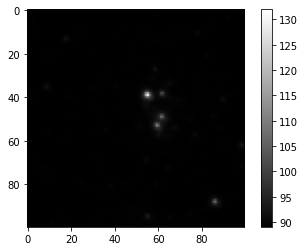

In [ ]:
plt.imshow(reshape_img(normalized_data[100]), cmap='gray')
plt.colorbar()

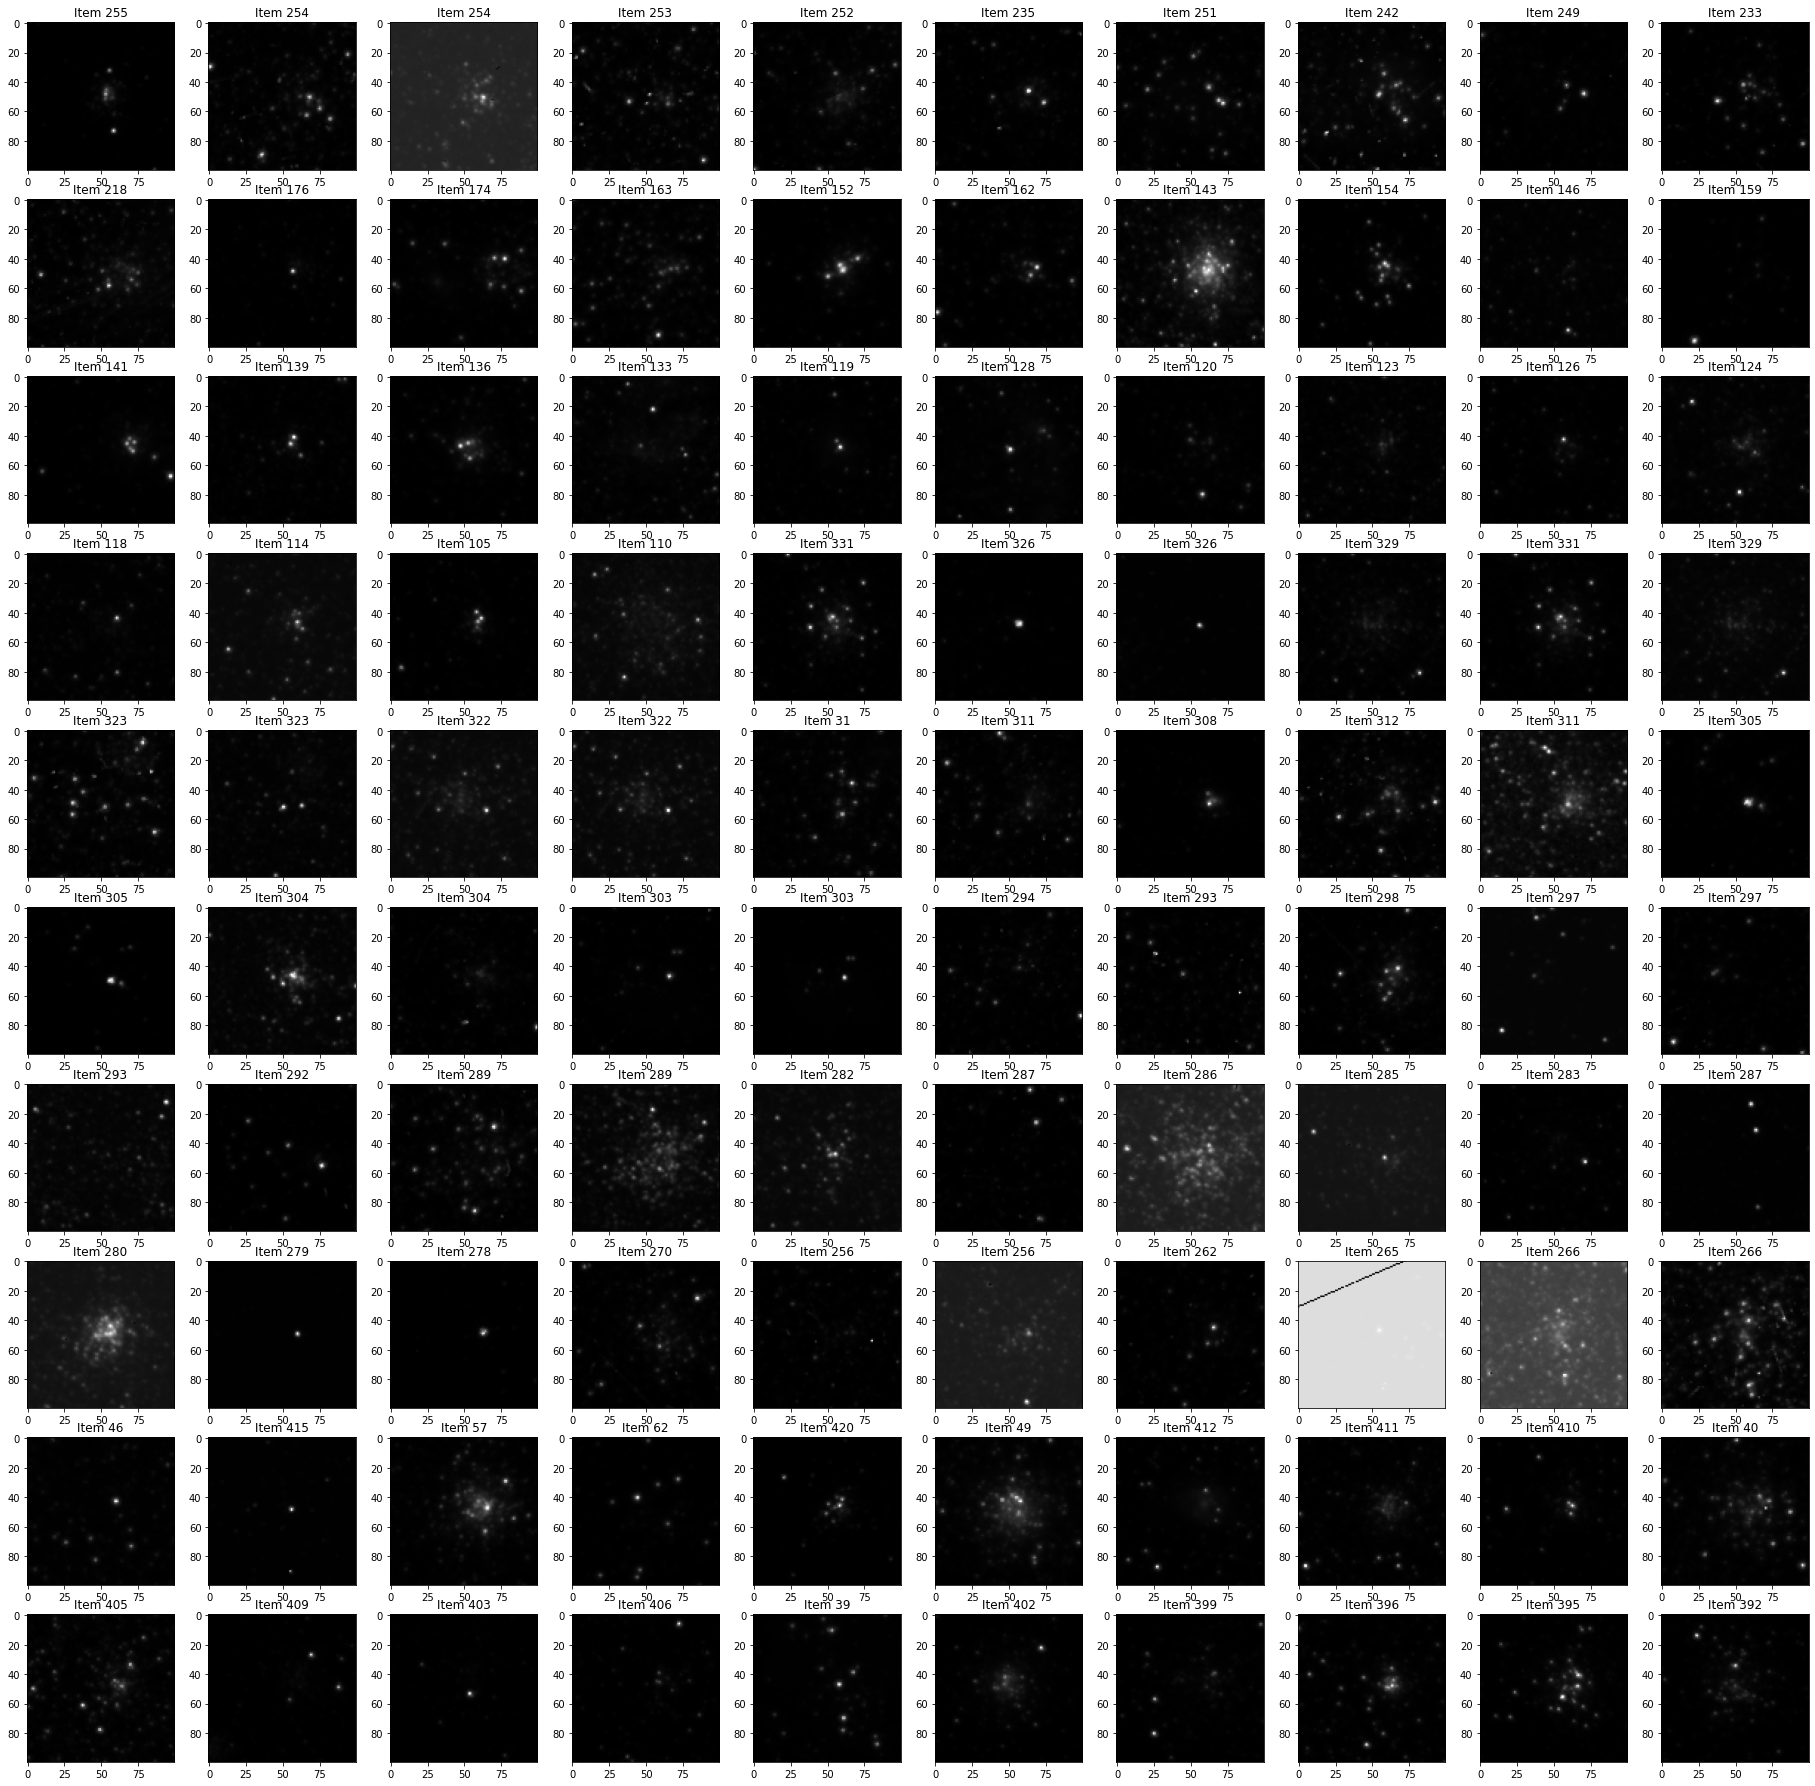

In [ ]:
plt.figure(figsize=(32, 32)) # specifying the overall grid size
index_ = 1
try:
  for i in range(len(normalized_data)):
    plt.subplot(10, 10, index_)
    plt.imshow(reshape_img(normalized_data[i]), cmap='gray')
    plt.title("Item {}".format(labeleds_list[i][0]))
    index_ += 1
except:
  pass
plt.show()

# Export the Features

In [ ]:
ind_ = []
lab_ = []
for i in labeleds_list:
  lab_.append(i[1])
  ind_.append(i[0])

In [ ]:
ind_arr = np.array(ind_)
lab_arr = np.array(lab_)

In [ ]:
normalized_data[0].shape, arr[0].shape

((10000,), (2,))

In [ ]:
arr[0][0], arr[0][1]

('255', 'Cluster')

In [ ]:
df = pd.DataFrame(normalized_data)
df['label'] = pd.DataFrame(lab_)
df['object_index'] = pd.DataFrame(ind_)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,label,object_index
0,89.097119,89.181202,89.405952,89.589793,89.376688,89.329118,90.142003,91.499417,90.545400,89.515859,...,89.202465,89.136982,89.124984,89.135825,89.154057,89.243031,89.208753,89.155796,Cluster,255
1,89.018007,89.021463,89.026470,89.026516,89.027220,89.021111,89.030080,89.041811,89.066178,89.120806,...,89.022966,89.020106,89.021060,89.024456,89.027584,89.030083,89.025957,89.023342,Cluster,254
2,89.049930,89.088277,89.067882,89.059134,89.076960,89.084333,89.102634,89.129416,89.118214,89.088871,...,89.062892,89.069242,89.134967,89.162135,89.157668,89.091523,89.057530,89.032415,Cluster,254
3,89.029896,89.029567,89.049038,89.046665,89.047181,89.040696,89.028588,89.017677,89.020201,89.020759,...,89.078312,89.052061,89.043303,89.034592,89.031627,89.029200,89.035860,89.060920,Cluster,253
4,89.035824,89.031872,89.024056,89.023906,89.025654,89.026047,89.023626,89.032217,89.033008,89.026863,...,89.031194,89.044278,89.045088,89.036864,89.041070,89.041948,89.030032,89.029235,Cluster,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,89.127422,89.186852,89.240914,89.621034,89.719309,89.347889,89.161144,89.132015,89.149708,89.164015,...,89.194790,89.277423,89.240666,89.197445,89.167256,89.140141,89.151885,89.164931,Cluster,81
123,89.218016,89.178375,89.202193,89.262606,89.246961,89.181396,89.164999,89.142604,89.165152,89.219581,...,91.682551,90.749593,89.762791,89.353235,89.231808,89.236754,89.219772,89.185733,Cluster,95
124,89.046271,89.033872,89.026638,89.027454,89.026943,89.034859,89.045678,89.063985,89.089362,89.088783,...,89.034448,89.042088,89.045169,89.055707,89.050537,89.045796,89.041474,89.053335,Unknown,98
125,89.071702,89.089640,89.042980,89.031734,89.027028,89.025479,89.029372,89.033199,89.028678,89.023856,...,89.047729,89.044479,89.035006,89.027018,89.030803,89.027064,89.020607,89.017191,Stellar,69


In [ ]:
# df.to_csv(r'dataset.csv', index = False)

# Handle with death pixel in big FITS

In [ ]:
number_of_file = 10

In [ ]:
# fits_image_filename = fits.util.get_testdata_filepath('../data/fits/{}.fits'.format(number_of_file))
hdu_list = fits.open('../data/fits/{}.fits'.format(number_of_file))
hdu_list.info()

Filename: ../data/fits/10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1878   ()      
  1  SCI           1 ImageHDU        82   (20921, 16750)   float32   
  2  WHT           1 ImageHDU        44   (20921, 16750)   float32   
  3  CTX           1 ImageHDU        35   ()      
  4  HDRTAB        1 BinTableHDU    638   72R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D, D, 1A, K

In [ ]:
image_data = hdu_list['SCI'].data

In [ ]:
min_pixel = np.min(image_data)
max_pixel = np.max(image_data)
mean_pixel = np.mean(image_data)
std_pixel = np.std(image_data)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: nan
Max: nan
Mean: nan
Stdev: nan


## Fill death pixel with -100

In [ ]:
imgs_arr_scaled = image_data.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = -100

In [ ]:
min_pixel = np.min(imgs_arr_scaled)
max_pixel = np.max(imgs_arr_scaled)
mean_pixel = np.mean(imgs_arr_scaled)
std_pixel = np.std(imgs_arr_scaled)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -100.0
Max: 97.75638
Mean: -70.88442
Stdev: 45.464375


## Export new fits

In [ ]:
hdu = fits.PrimaryHDU(imgs_arr_scaled) # save img into google drive
hdulist = fits.HDUList([hdu])
path = '../data/scaled_fits/{}.fits'.format(number_of_file)
hdulist.writeto(path)